In [1]:
import tensorflow as tf

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [4]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
import matplotlib.pyplot as plt

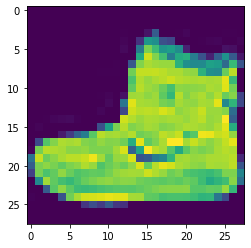

In [9]:
plt.imshow(train_images[0])
plt.show()

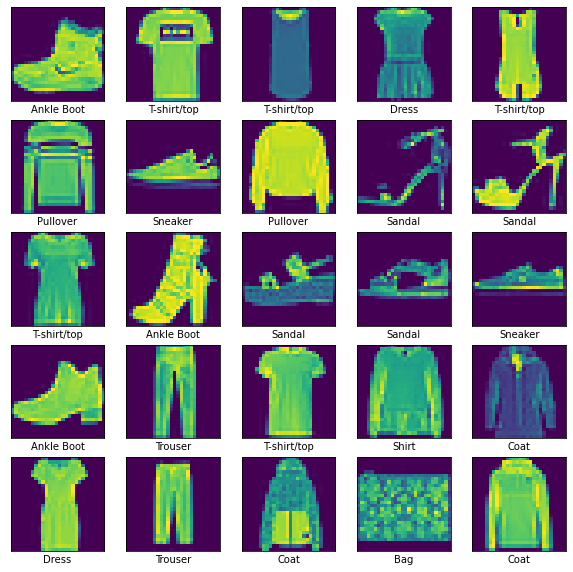

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
import tensorflow as tf

In [12]:
#model=Sequential()
#model.add(Flatten(input_shape=(28,28)))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(10,activation="softmax"))



In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [19]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.3897 - accuracy: 0.6830
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6670 - accuracy: 0.7691
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5653 - accuracy: 0.8035
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5237 - accuracy: 0.8160
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5111 - accuracy: 0.8211
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4971 - accuracy: 0.8261
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4918 - accuracy: 0.8291
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4860 - accuracy: 0.8304
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4791 - accuracy: 0.8317
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.472

In [20]:
train_images.shape

(60000, 28, 28)

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [24]:
predictions=probability_model.predict(test_images)

In [25]:
predictions[0]

array([2.6488889e-14, 1.5571867e-10, 5.1328764e-36, 3.7256225e-09,
       5.5450759e-28, 6.4127386e-02, 2.7015011e-24, 9.5325798e-02,
       2.3153870e-10, 8.4054679e-01], dtype=float32)

In [28]:
import numpy as np

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

Text(0.5, 1.0, 'Bag')

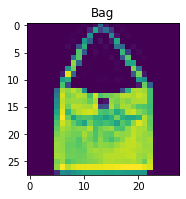

In [43]:
i=700
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(test_images[i])
plt.title(class_names[np.argmax(predictions[i])])